In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
#from openmm import app
#import openmm as mm
#from openmm import unit as u
import pdbfixer
#import mdshare
#from sys import stdout

In [2]:
#simulation_traj = md.load('data/output.pdb')###delete
petide_in_water = md.load('data/peptide_model_water.pdb')###add
simulation_traj = md.load_dcd('data/output.dcd',top=petide_in_water.top)###add
traj_ANP = md.load('data/peptide_fixed.pdb')
simulation_log_head = np.loadtxt('data/mm.log',dtype=str,max_rows=1,delimiter=',',comments=None)
simulation_log = np.loadtxt('data/mm.log',delimiter=',')

In [3]:
sim_time = simulation_log[:,1]

In [4]:
#Cutting out the petide to do the rmsd
simulation_top = simulation_traj.top
selection_simulation = simulation_top.select('chainid 0')
petide_simulation_traj = simulation_traj.atom_slice(selection_simulation)

In [5]:
rmsd = md.rmsd(petide_simulation_traj,traj_ANP)

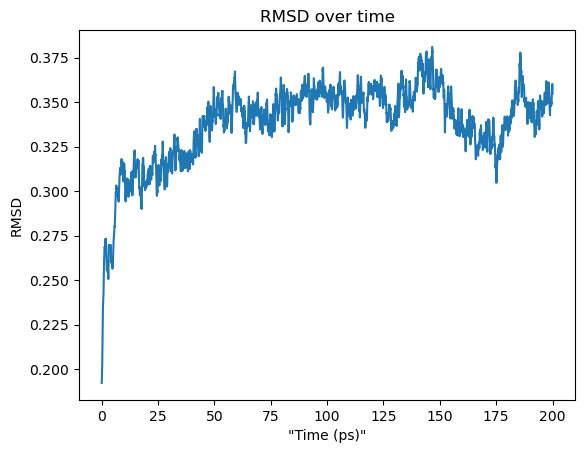

In [6]:
plt.plot(sim_time,rmsd)
plt.xlabel(simulation_log_head[1])
plt.ylabel('RMSD')
plt.title('RMSD over time')
plt.show()